#  TP2- Régression linéaire "from scratch" 
## TP2.4  Régression polynomiale


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import run_gradient_descent_ng, zscore_normalize_features
#np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

<a name='FeatureEng'></a>

La régression linéaire permet de construire des modèles de la forme :
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$
 Que se passe-t-il si vos caractéristiques/données ne sont pas linéaires ou sont des combinaisons de caractéristiques? Par exemple, les prix des logements n'ont pas tendance à être linéaires par rapport à la surface habitable, mais pénalisent les maisons très petites ou très grandes? Comment pouvons-nous utiliser les mécanismes de régression linéaire pour ajuster cette courbe ? <br>
**PS** : Rappelons que le "mécanisme" dont nous disposons est la capacité de modifier les paramètres $\mathbf{w}$, $\mathbf{b}$ dans (1) pour "ajuster" l'équation aux données d'apprentissage. Cependant, aucun ajustement de $\mathbf{w}$, $\mathbf{b}$ dans (1) ne permettra d'ajuster une courbe non linéaire.


<a name='PolynomialFeatures'></a>
## Feature Engineering - Variables (features) Polynomiales 

On part sur des données X, y suivantes (à une variable)
- x = np.arange(0, 20, 1)
- y = 1 + x**2

On essaie de trouver le modèle linéaire $f_{\mathbf{w},b} = w_0x_0 +b$ qui "colle" aux données.


Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
####################################
w,b found by gradient descent: w: [18.69806954], b: -52.0834


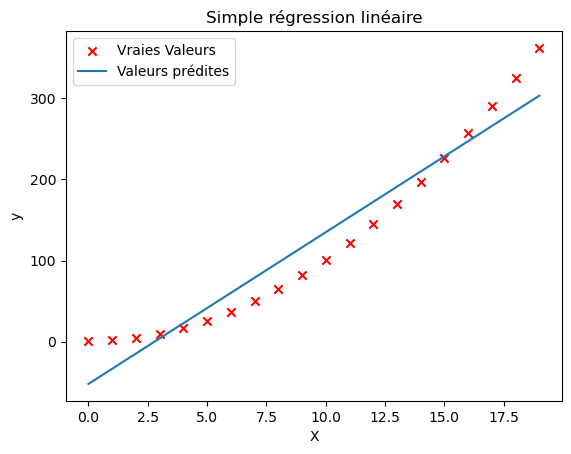

In [10]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)
 
# C'est la fonction qui regroupe les fonctions vues dans le TP 3
model_w,model_b = run_gradient_descent_ng(X,y,iterations=1000, alpha = 1e-2)

plt.scatter(x, y, marker='x', c='r', label="Vraies Valeurs"); plt.title("Simple régression linéaire")
plt.plot(x,X@model_w + model_b, label="Valeurs prédites");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Comme on pouvait s'y attendre, l'ajustement n'est pas  bon. Ce qu'il faut, c'est quelque chose comme $y= w_0x_0^2 + b$, ou une **caractéristique polynomiale**.
Pour ce faire, on peut modifier les *données d'entrée* pour *élaborer* les caractéristiques appropriées. Si on remplace les données d'origine par une version qui élève la valeur $x$ au carré, on peut obtenir $y= w_0x_0^2 + b$. Essayons-le. Remplacez `X` par `X**2` ci-dessous :



In [11]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineered features 
X = x**2      #<-- added engineered feature

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
####################################
w,b found by gradient descent: w: [1.00417494], b: 0.0490


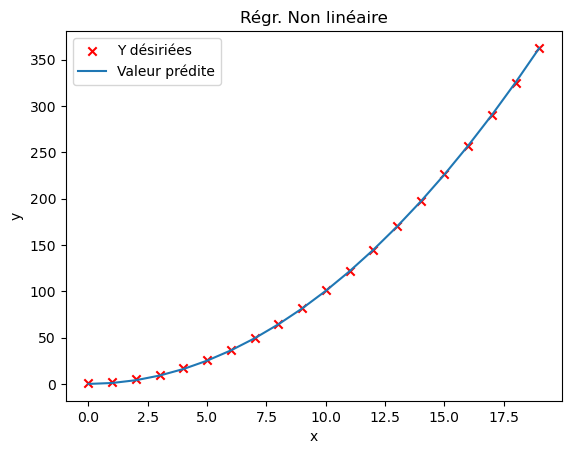

In [12]:
X = X.reshape(-1, 1)  #X should be a 2-D Matrix
model_w,model_b = run_gradient_descent_ng(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Y désiriées"); plt.title("Régr. Non linéaire")
plt.plot(x, np.dot(X,model_w) + model_b, label="Valeur prédite"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

L'ajustement est presque parfait. Remarquez les valeurs de $\mathbf{w}$ et de b imprimées juste au-dessus du graphique : `w,b found by gradient descent : w : [1.], b : 0.0490`. La descente de gradient a modifié nos valeurs initiales de $\mathbf{w},b $ pour qu'elles soient (1.0,0.049) ou un modèle de $y=1*x_0^2+0.049$, très proche de notre objectif de $y=1*x_0^2+1$. Si on l'exécute plus longtemps, la correspondance pourrait être meilleure. 

### Sélection des caractéristiques (Featue selection)
Ci-dessus, nous savions qu'un terme $x^2$ était nécessaire. Il n'est pas toujours évident de déterminer les caractéristiques nécessaires. Nous pouvons ajouter une variété de caractéristiques potentielles pour essayer de trouver la plus utile. Par exemple, que se passerait-il si nous essayions : $y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$ ? 

Testons ci dessous.

In [13]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
# on a donc trois features, x, x2 et x3.
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
####################################
w,b found by gradient descent: w: [0.08237526 0.53552137 0.02752216], b: 0.0106


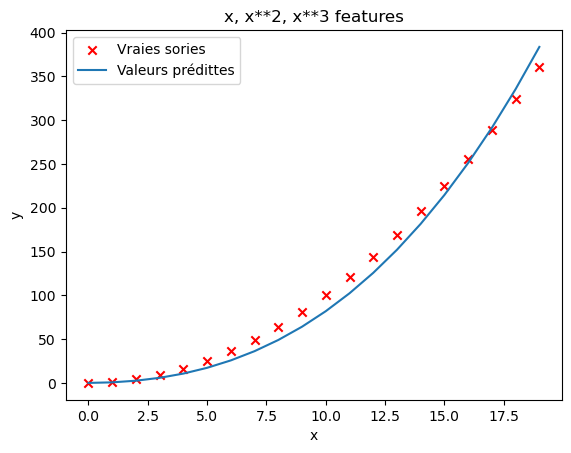

In [14]:
model_w,model_b = run_gradient_descent_ng(X, y, iterations=10000, alpha=1e-7)

plt.scatter(x, y, marker='x', c='r', label="Vraies sories"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Valeurs prédittes"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Notez la valeur de $\mathbf{w}$, `[0.08 0.54 0.03]` et b est `0.0106`.Cela implique que le modèle après ajustement/entraînement est :
$$ 0.08x + 0.54x^2 + 0.03x^3 + 0.0106 $$
La descente de gradient a mis l'accent sur les données qui correspondent le mieux aux données $x^2$ en augmentant le terme $w_1$ par rapport aux autres.  Si vous exécutez le programme pendant très longtemps, il continuera à réduire l'impact des autres termes. 
>La descente de gradient sélectionne les caractéristiques "correctes" pour nous en mettant l'accent sur le paramètre associé.

Examinons cette idée :
- Au départ, les caractéristiques ont été redimensionnées de manière à ce qu'elles soient comparables les unes aux autres.
- Une valeur de poids inférieure implique une caractéristique moins importante/correcte et, à l'extrême, lorsque le poids devient nul ou très proche de zéro, la caractéristique associée est utile pour ajuster le modèle aux données.
- ci-dessus, après l'ajustement, le poids associé à la caractéristique $x^2$ est beaucoup plus important que les poids pour $x$ ou $x^3$, car c'est la caractéristique la plus utile pour l'ajustement aux données. 


### Fonctions plus complexes
On peut iutiliser des fonctions plus complexes : 
$$f_w,b(x)=w_0x_0 + w_1x_1^2 + w_2x_2^3+w_3x_3^4+...+w_{12}x_{12}^{13}+b$$

Iteration         0, Cost: 2.24887e-01
Iteration    100000, Cost: 2.31061e-02
Iteration    200000, Cost: 1.83619e-02
Iteration    300000, Cost: 1.47950e-02
Iteration    400000, Cost: 1.21114e-02
Iteration    500000, Cost: 1.00914e-02
Iteration    600000, Cost: 8.57025e-03
Iteration    700000, Cost: 7.42385e-03
Iteration    800000, Cost: 6.55908e-03
Iteration    900000, Cost: 5.90594e-03
####################################
w,b found by gradient descent: w: [-1.61035138e+00 -1.00624795e+01  3.00029328e+01 -6.91665020e-01
 -2.36908018e+01 -1.51363834e+01  2.08722991e+01 -2.29331209e-03
 -4.68700607e-03  5.51048134e-02  1.06934475e-01 -2.52628726e-02
  6.48762638e-02], b: -0.0073


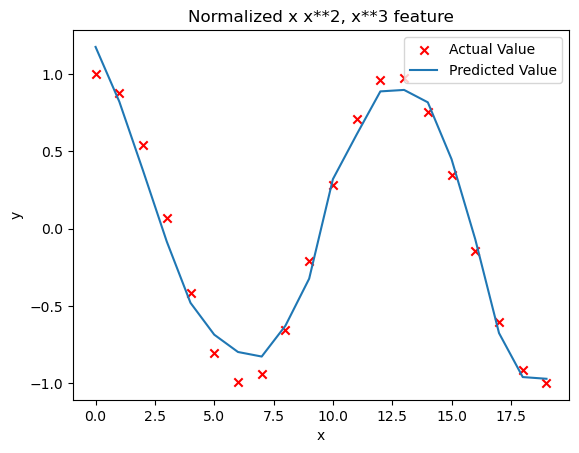

In [15]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]

## Fonction de normalisation des données TRES IMPORTANTES EN Machine Learning
## Tester avecx et sans cette fonction.

X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_ng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()
